# Experimentos con Dataset Disvoice Hombres
## Adrián Arnaiz
> * Ruta: */ser/CaracteristicasExtraidas/DivisionSexo/hombres*
* Módulo de carga de datos: */src/cargaDatosHombres.py*
     * Cada uno Contiene load_....py siendo ... todos los conjuntos de datos extraidos para Disvoice de hombres. [30: 18 normales + 12 excatos Orozco 2016 ]

* **Por lo general peores resultados que con los audios de mujeres, aunque en muchos casos son similares. Solo en un caso tiene mejores resultados (Seleckt KBest + RF) pero no se obtiene el mejor resultado hasta el momento. Se obtienen resultados que se encuentran entre los resultados de las mujeres y los resultados con Disvoice (Edad + Sexo)**. Hay algunos por encima de 0.8 pero sin mejorar significativamente los resultados obtenidos hasta ahora.
* **Tonica habittual: se incrementan el scoring auc en la mayoría pero sin incrementos significativos. Llegan mas clasificadores al 0.8 pero sin llegar al 0.9 en ningun caso, no batimos nuestro mejor resultado.**
* **Sobre todo en los procesos que realizamos selección de atributos llegamos a tener varios clasificadores alrededor del 0.8 lo que, al igual que pasaba antes con los datasets de las mujeres, mejoran los resultados iniciales sin dividir por sexo.** 
* **Sin embargo el resultado más óptimo hasta ahora no se bate.**

**Mejores resultados. Select_k_Best+RF:**
> * fon_w_gato	0.87500
* art_w_atleta	0.873333

<a id="index"></a>
## Índice del notebook
1. [Experimentos hombres](#rep)
 1. [Experimentos estandar - Experimenter](#exp)
    1. [Accuracy - atribs. por defecto](#acudef)
    2. [Accuracy - atribs. normalizados](#acunorm)
    3. [AUC - atribs. por defecto](#aucdef)
    4. [Accuracy - atribs. normalizados](#aucnorm)
 5. [Grid-Search \ SVM $\rightarrow$ Orozco](#gssvm)
 6. [Variance Treshold](#vtres)
 7. [SKBest](#skbest)
 8. [! Grid Search \ VarianceTeshold + AdaBoost](#vtab)
 9. [! Grid Search \ Seleckt KBest + RF](#skrf)
 9. [! Grid Search \ Seleckt KBest + AdaBoost](#skada)
 9. [! Grid Search \ Seleckt KBest + GBC](#skgbc)
 ----------------------

In [1]:
import cargaDatosHombres
from extractorCcas import ExtractorCaracteristicas
from experimenter import *
from IPython.display import clear_output
import numpy as np
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, chi2, VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# 1. Experimentos conjunto de datos mujeres <a id="rep"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Repetiremos el conjuto de experimentos que hemos ido realizando para todos los anteriores conjuntos de datos y así poder comparar resultados.

**Experimenter.GridSearchPipe(moduloDeDatos, pipe, paramgrid, verbose=True, normalizar=True): utiliza ROC_AUC**
## 1.1 Experimentos estandar - Experimenter <a id="exp"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [2]:
tipoDatos = "cargaDatosHombres"
general = {
    "ID":"ExperimentoBase",
    "N_FOLDS":10
}

datasets = [
    {
        "ID_DATA":"art_rt",
        "ORIGIN": tipoDatos+".load_art_rt",
    },
    {
        "ID_DATA":"art_rt_ON",
        "ORIGIN": tipoDatos+".load_art_rt_onset",
    },
    {
        "ID_DATA":"art_rt_OFF",
        "ORIGIN": tipoDatos+".load_art_rt_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_atleta",
        "ORIGIN":tipoDatos+".load_art_w_atleta",
    },
    {
        "ID_DATA":"art_w_atleta_ON",
        "ORIGIN":tipoDatos+".load_art_w_atleta_onset",
    },
    {
        "ID_DATA":"art_w_atleta_OFF",
        "ORIGIN":tipoDatos+".load_art_w_atleta_ofset",
    },
    
    
    
    {
        "ID_DATA":"art_w_braso",
        "ORIGIN":tipoDatos+".load_art_w_braso",
    },
    {
        "ID_DATA":"art_w_braso_ON",
        "ORIGIN":tipoDatos+".load_art_w_braso_onset",
    },
    {
        "ID_DATA":"art_w_braso_OFF",
        "ORIGIN":tipoDatos+".load_art_w_braso_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_campana",
        "ORIGIN":tipoDatos+".load_art_w_campana",
    },
    {
        "ID_DATA":"art_w_campana_ON",
        "ORIGIN":tipoDatos+".load_art_w_campana_onset",
    },
    {
        "ID_DATA":"art_w_campana_OFF",
        "ORIGIN":tipoDatos+".load_art_w_campana_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_gato",
        "ORIGIN":tipoDatos+".load_art_w_gato",
    },
    {
        "ID_DATA":"art_w_gato_ON",
        "ORIGIN":tipoDatos+".load_art_w_gato_onset",
    },
    {
        "ID_DATA":"art_w_gato_OFF",
        "ORIGIN":tipoDatos+".load_art_w_gato_ofset",
    },
    
    
    {
        "ID_DATA":"art_w_petaka",
        "ORIGIN":tipoDatos+".load_art_w_petaka",
    },
    {
        "ID_DATA":"art_w_petaka_ON",
        "ORIGIN":tipoDatos+".load_art_w_petaka_onset",
    },
    {
        "ID_DATA":"art_w_petaka_OFF",
        "ORIGIN":tipoDatos+".load_art_w_petaka_ofset",
    },
    
    
    {
        "ID_DATA":"fon_rt",
        "ORIGIN":tipoDatos+".load_fon_rt",
    },
    {
        "ID_DATA":"fon_v_A",
        "ORIGIN":tipoDatos+".load_fon_v_A",
    },
    {
        "ID_DATA":"fon_v_E",
        "ORIGIN":tipoDatos+".load_fon_v_E",
    },
    {
        "ID_DATA":"fon_v_I",
        "ORIGIN":tipoDatos+".load_fon_v_I",
    },
    {
        "ID_DATA":"fon_v_O",
        "ORIGIN":tipoDatos+".load_fon_v_O",
    },
    {
        "ID_DATA":"fon_v_U",
        "ORIGIN":tipoDatos+".load_fon_v_U",
    },
    {
        "ID_DATA":"fon_w_atleta",
        "ORIGIN":tipoDatos+".load_fon_w_atleta",
    },
    {
        "ID_DATA":"fon_w_braso",
        "ORIGIN":tipoDatos+".load_fon_w_braso",
    },
    {
        "ID_DATA":"fon_w_campana",
        "ORIGIN":tipoDatos+".load_fon_w_campana",
    },
    {
        "ID_DATA":"fon_w_gato",
        "ORIGIN":tipoDatos+".load_fon_w_gato",
    },
    {
        "ID_DATA":"fon_w_petaka",
        "ORIGIN":tipoDatos+".load_fon_w_petaka",
    },
    {
        "ID_DATA":"prs_rt",
        "ORIGIN":tipoDatos+".load_prs_rt",
    }

]

algoritmos = [
    {
        "ID_ALG":"KNN8",
        "ALGO": "sklearn.neighbors.KNeighborsClassifier",
        "PARAMS":{
            "n_neighbors":8,
            "metric":"euclidean"
        }
    },
    {
        "ID_ALG":"Tree",
        "ALGO": "sklearn.tree.DecisionTreeClassifier",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"Bayes",
        "ALGO": "sklearn.naive_bayes.GaussianNB",
        "PARAMS":{  # Parámetros por defecto       
        }
    },
    {
        "ID_ALG":"SVM",
        "ALGO": "sklearn.svm.SVC",
        "PARAMS":{
        }
    },
    {
        "ID_ALG":"RandomF",
        "ALGO": "sklearn.ensemble.RandomForestClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Ada",
        "ALGO": "sklearn.ensemble.AdaBoostClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"Reglas",
        "ALGO": "sklearn.dummy.DummyClassifier",
        "PARAMS":{ 
        }
    },
    {
        "ID_ALG":"GBC",
        "ALGO": "sklearn.ensemble.GradientBoostingClassifier",
        "PARAMS":{ 
        }
    },
    
]

output = {
    "METRIC":"accuracy",
    "DISPLAY":"table"
}

experimento = {
    "GENERAL":general,
    "DATASETS":datasets,
    "ALGORITMOS":algoritmos,
    "OUTPUT": output    
}

### 1.1.1 Acuracy -  atribs sin modificar <a id="acudef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor: art_w_campana: GBC: 0.808

AdaBOOST, que era antes el mejor, se comporta peor que antes en la mayoría de los datasets (excepciones como art_petaka). Sin embargo está dentro de los  que mejor funcionan: GBC, ADA, TREE. **(0.8 GBC-art_campana)**. 1 por encima del 0.8.

No hay mejora significativa ni debido a la división del conjunto por sexos, ni debido a la extracción exacta de ccas como las de Orozco (_ON y _OF)

In [3]:
warnings.filterwarnings('ignore')
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [4]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.633333,0.491667,0.608333,0.558333,0.600000,0.466667,0.325000,0.641667
art_rt_ON,0.416667,0.341667,0.325000,0.458333,0.550000,0.433333,0.466667,0.533333
art_rt_OFF,0.441667,0.533333,0.558333,0.400000,0.500000,0.550000,0.491667,0.575000
art_w_atleta,0.666667,0.658333,0.483333,0.483333,0.625000,0.700000,0.425000,0.600000
art_w_atleta_ON,0.483333,0.641667,0.358333,0.566667,0.708333,0.583333,0.625000,0.600000
art_w_atleta_OFF,0.575000,0.566667,0.500000,0.533333,0.625000,0.650000,0.466667,0.633333
art_w_braso,0.425000,0.633333,0.616667,0.500000,0.625000,0.583333,0.566667,0.591667
art_w_braso_ON,0.375000,0.541667,0.608333,0.533333,0.441667,0.516667,0.400000,0.541667
art_w_braso_OFF,0.483333,0.558333,0.508333,0.558333,0.583333,0.483333,0.508333,0.583333
art_w_campana,0.408333,0.608333,0.433333,0.516667,0.666667,0.725000,0.458333,0.658333


In [5]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.2 Acuracy -  atribs normalizados <a id="acunorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejor resultado: fon v_U y art_campana.  **(0.74 GBC-fon_v_U)**. 0 por encima del 0.8

In [6]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [7]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.608333,0.625000,0.608333,0.691667,0.583333,0.466667,0.391667,0.658333
art_rt_ON,0.516667,0.341667,0.325000,0.350000,0.450000,0.433333,0.483333,0.541667
art_rt_OFF,0.575000,0.450000,0.558333,0.558333,0.466667,0.516667,0.600000,0.525000
art_w_atleta,0.616667,0.575000,0.483333,0.591667,0.566667,0.700000,0.550000,0.600000
art_w_atleta_ON,0.650000,0.633333,0.358333,0.541667,0.566667,0.616667,0.608333,0.616667
art_w_atleta_OFF,0.575000,0.608333,0.500000,0.525000,0.508333,0.650000,0.491667,0.650000
art_w_braso,0.591667,0.641667,0.616667,0.633333,0.616667,0.583333,0.533333,0.591667
art_w_braso_ON,0.541667,0.516667,0.608333,0.500000,0.550000,0.516667,0.400000,0.491667
art_w_braso_OFF,0.558333,0.491667,0.508333,0.483333,0.508333,0.483333,0.566667,0.583333
art_w_campana,0.533333,0.625000,0.433333,0.475000,0.616667,0.725000,0.433333,0.683333


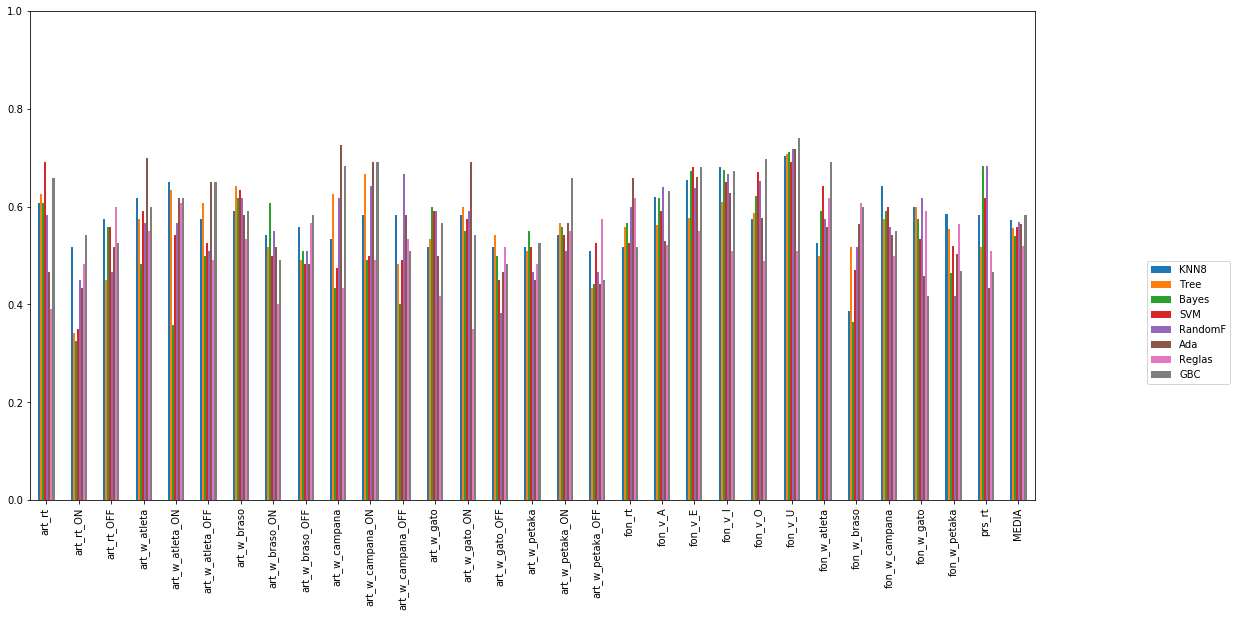

In [8]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.3 Auc - sin modificar <a id="aucdef"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
El que mejor funciona es fon_v_U, y art_campana_ON. Los 2 mejores son Ada y GBC **(0.81 Ada-art_campanaON y GBC-fon_v_u)**. **Nos acercamos al mejor resultado obtenido por nosotros en un experimento**. 
Al igual que con las mujeres**unvoiced**(exactas Orzco2016), nos ayuda a mejorar sensiblemente un resultado. El set art_campanaON en concreto.

In [9]:
experimento['OUTPUT']['METRIC']='roc_auc'
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [10]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.662500,0.633333,0.654167,0.377778,0.652778,0.477778,0.533333,0.625000
art_rt_ON,0.333333,0.366667,0.266667,0.494444,0.252778,0.350000,0.450000,0.494444
art_rt_OFF,0.354167,0.500000,0.611111,0.486111,0.597222,0.600000,0.616667,0.630556
art_w_atleta,0.602778,0.608333,0.580556,0.513889,0.627778,0.794444,0.550000,0.650000
art_w_atleta_ON,0.483333,0.641667,0.358333,0.583333,0.615278,0.561111,0.575000,0.686111
art_w_atleta_OFF,0.634722,0.616667,0.550000,0.616667,0.568056,0.708333,0.366667,0.769444
art_w_braso,0.459722,0.708333,0.643056,0.558333,0.719444,0.616667,0.566667,0.680556
art_w_braso_ON,0.376389,0.491667,0.527778,0.569444,0.455556,0.577778,0.491667,0.441667
art_w_braso_OFF,0.493056,0.466667,0.550000,0.577778,0.500000,0.544444,0.450000,0.547222
art_w_campana,0.415278,0.641667,0.411111,0.379167,0.566667,0.763889,0.466667,0.761111


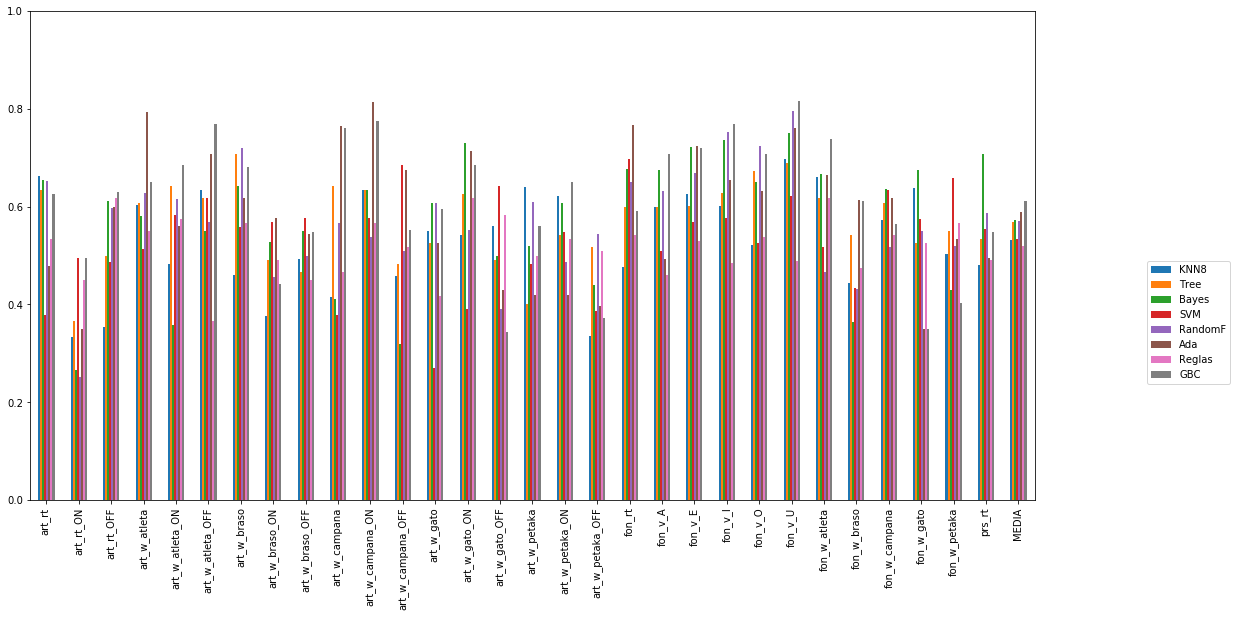

In [11]:
ex.process_results(all_results, data_names, model_names, 'bar')

### 1.1.4  Auc - Normalizados <a id="aucnorm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Resultados mejores con art_ccampana_on y fon_vu **(0.81 Ada-art_campanaOFF y GBC-fon_v_u)**

In [12]:
ex = Experimenter()
name_exp,num_folds = ex.get_datos_generales(experimento)
data_names,data_X,data_y = ex.get_datasets(experimento, True)
model_names,models = ex.get_algoritmos(experimento)
score,rep_type = ex.get_output_options(experimento)
all_results = ex.cross_validate_all_models(data_names, data_X,data_y,models,num_folds,score)
clear_output()

In [13]:
ex.process_results(all_results, data_names, model_names, rep_type)

,KNN8,Tree,Bayes,SVM,RandomF,Ada,Reglas,GBC
art_rt,0.640278,0.616667,0.654167,0.736111,0.561111,0.477778,0.608333,0.566667
art_rt_ON,0.572222,0.350000,0.266667,0.338889,0.252778,0.350000,0.558333,0.505556
art_rt_OFF,0.629167,0.416667,0.611111,0.605556,0.613889,0.600000,0.483333,0.569444
art_w_atleta,0.647222,0.516667,0.580556,0.713889,0.704167,0.794444,0.458333,0.625000
art_w_atleta_ON,0.656944,0.625000,0.358333,0.469444,0.805556,0.594444,0.483333,0.686111
art_w_atleta_OFF,0.623611,0.616667,0.550000,0.644444,0.613889,0.708333,0.616667,0.791667
art_w_braso,0.586111,0.700000,0.643056,0.694444,0.659722,0.627778,0.591667,0.583333
art_w_braso_ON,0.547222,0.475000,0.527778,0.511111,0.498611,0.577778,0.483333,0.430556
art_w_braso_OFF,0.487500,0.541667,0.550000,0.463889,0.476389,0.544444,0.508333,0.613889
art_w_campana,0.497222,0.666667,0.416667,0.491667,0.706944,0.763889,0.533333,0.761111


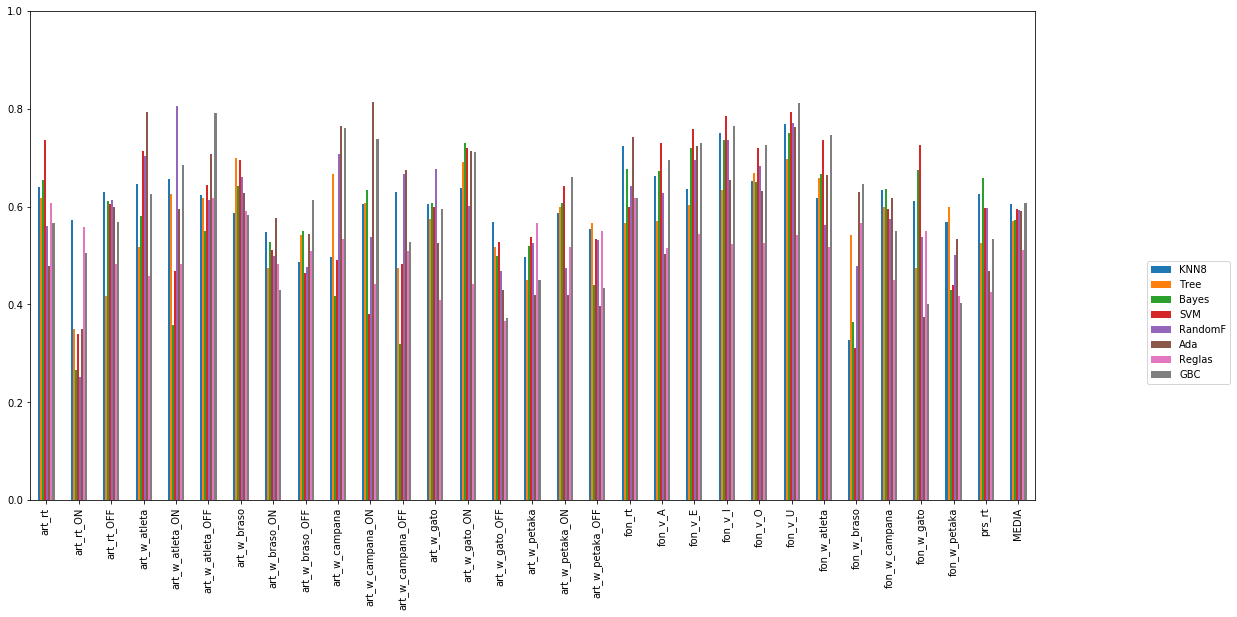

In [14]:
ex.process_results(all_results, data_names, model_names, 'bar')

## 1.2 Grid Search Orozco <a id="gssvm"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Explicada las funciones, parámetros devueltos y funcionamiento del experimento en notebooks anteriores y documentación de la calse. Experimento artículo 2016 Orozco: SVM con kernel gaussiano haciendo gridSearch de parámetros C y  𝛾  realizando 10-fold cross-validation. SCORING:AUC.  **Mejores resultados normalizando**.

**Si que se mejoran los scores en este tipo de experimento en comparación con todo lo realizado anteriormente: disvoice y disvoice + edad y sexo**.**Similares e incluso un poco mejores pero de manera casi inapreciable al de las mujeres**. Mejor: **(0.813 prs_rt - SVM('C': 1, 'gamma': 10))**

In [15]:
def best_to_panda(mej):
    mejores_ordenados = [(mej[m]['score'], mej[m]['params'], m) for m in sorted(mej, key=lambda x: mej[x]['score'], reverse=True)]
    return pd.DataFrame(columns = ['score','params','dtst'], data=mejores_ordenados).set_index('dtst')

In [16]:
ex = Experimenter()
param_grid = [
      {'C': [1,10,20,50,100,200,500,1000,2000,5000,10000], 'kernel': ['rbf'], 'gamma' : [1,10,20,50,100,200,500,1000]},
 ]

bestsOrz = ex.GridSearchPipe(cargaDatosHombres,svm.SVC(),param_grid, verbose=False, normalizar=True)
best_to_panda(bestsOrz)

,score,params
dtst,,
prs_rt,0.813333,"{'C': 1, 'gamma': 10, 'kernel': 'rbf'}"
fon_v_I,0.780000,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
fon_v_U,0.779762,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
fon_rt,0.766667,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"
fon_v_O,0.761905,"{'C': 100, 'gamma': 1, 'kernel': 'rbf'}"
art_w_braso_onset,0.753333,"{'C': 1, 'gamma': 100, 'kernel': 'rbf'}"
art_w_atleta_onset,0.740000,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
art_w_atleta_ofset,0.726667,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}"
fon_w_campana,0.706667,"{'C': 10, 'gamma': 1, 'kernel': 'rbf'}"


## 1.3 Variance Treshold <a id="vtres"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
SCORING = AUC. AdaBoost  **(0.814 art_campana_Onset-AdaBoost)** igual que antes con params por defecto y atributos normalizados.

In [18]:
modulo = cargaDatosHombres

In [19]:
def seleccion_atribs_pipe(modulo, selector, clsf):
    res=[]
    for dtst in [ d for d in dir(modulo) if d.startswith('load')]:
        datos = getattr(modulo, dtst)()
        X = datos.data
        y = datos.target
        sc = MinMaxScaler()
        X = sc.fit(X).transform(X) if clsf != 'AdaBoostClassifier' else X #Comentar para no normalizar
        params = 'chi2, K=19' if selector == 'SelectKBest' else ''
        params = 'threshold=(0.1)' if selector == 'VarianceThreshold' and clsf == 'AdaBoostClassifier' else ''
        estimators = [('feat_sel', eval(selector+'('+params+')')), ('clf', eval(clsf+'()'))]
        pipe = Pipeline(estimators)
        sc=cross_val_score(pipe, X, y, cv=10, scoring='roc_auc').mean()
        res.append(sc)
    return res

In [20]:
df_VT = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'VarianceThreshold',clf)
    df_VT[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_VT

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.475000,0.530556,0.736111,0.616667
art_rt_ofset,0.577778,0.594444,0.605556,0.406944
art_rt_onset,0.350000,0.519444,0.338889,0.418056
art_w_atleta,0.761111,0.708333,0.713889,0.630556
art_w_atleta_ofset,0.708333,0.780556,0.644444,0.761111
art_w_atleta_onset,0.572222,0.686111,0.469444,0.680556
art_w_braso,0.625000,0.608333,0.694444,0.712500
art_w_braso_ofset,0.555556,0.575000,0.463889,0.462500
art_w_braso_onset,0.577778,0.419444,0.511111,0.487500
art_w_campana,0.797222,0.713889,0.491667,0.731944


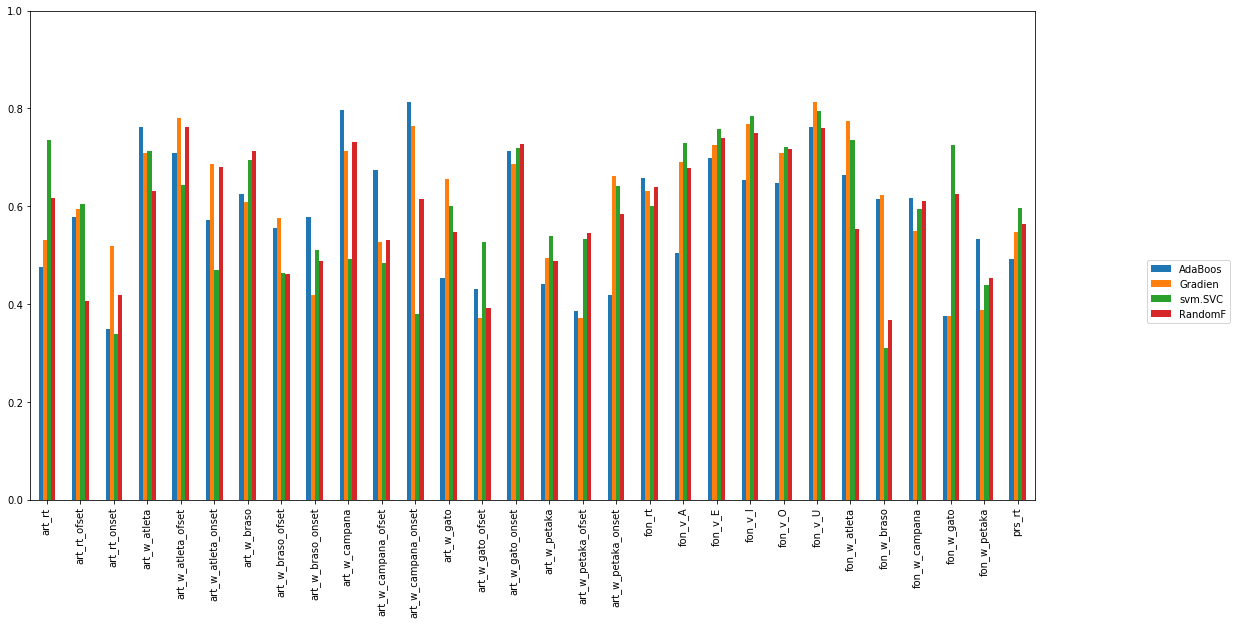

In [21]:
df_VT.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.4 SKBEST <a id="skbest"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
Mejores resultados art_campana, art_ rt y art_gato_onset. 4 por encima de 0.8. **(0.82 GBC-art_w_gato_on) y (0.836 SVM-Fon_v_I)**

In [22]:
df_SK = pd.DataFrame(index=[ d[5:] for d in dir(modulo) if d.startswith('load')])
clasificadores = ['AdaBoostClassifier', 'GradientBoostingClassifier', 'svm.SVC', 'RandomForestClassifier']
for clf in clasificadores:
    res= seleccion_atribs_pipe(modulo, 'SelectKBest',clf)
    df_SK[clf[:7]]= pd.DataFrame(res,[ d[5:] for d in dir(modulo) if d.startswith('load')],columns=[clf[:7]])
df_SK

,AdaBoos,Gradien,svm.SVC,RandomF
art_rt,0.602778,0.627778,0.686111,0.604167
art_rt_ofset,0.633333,0.611111,0.652778,0.620833
art_rt_onset,0.536111,0.594444,0.483333,0.487500
art_w_atleta,0.816667,0.747222,0.719444,0.736111
art_w_atleta_ofset,0.702778,0.688889,0.733333,0.722222
art_w_atleta_onset,0.677778,0.786111,0.555556,0.727778
art_w_braso,0.541667,0.497222,0.705556,0.626389
art_w_braso_ofset,0.636111,0.672222,0.472222,0.490278
art_w_braso_onset,0.283333,0.405556,0.422222,0.398611
art_w_campana,0.766667,0.669444,0.608333,0.672222


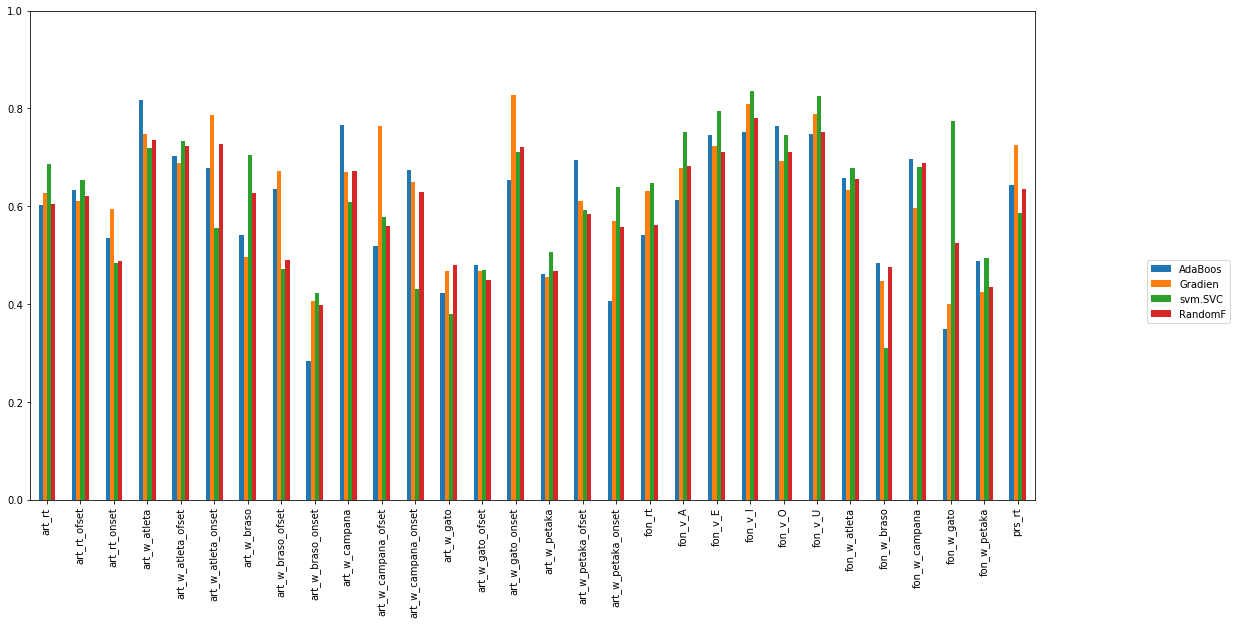

In [23]:
df_SK.plot(kind='bar', ylim=(0,1), figsize=(18,9)).legend(bbox_to_anchor=(1.2, 0.5))

## 1.5 Grid Search - Variance Treshold + AdaBoost <a id="vtab"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Tonica habitual: mejores los art: (transiciones), todos suben por lo general, algunos por encima del 0.8.** Sin embargo, **no se alcanzan los resultados de los datasets de las mujeres** (0.88, 0.84..). 

Mejor: **(0.853 art_w_campana_onset	{'select__threshold': 0.04})**

##### Sin Normalizar 

In [24]:
ex = Experimenter()
param_grid = dict(select__threshold=[0.05, 0.08, 0.16, 0.2, 0.4 ])
pip = Pipeline([('select', VarianceThreshold()), ('clf', AdaBoostClassifier())])

bestsGsVtAda = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid, verbose=False, normalizar=False)

In [25]:
best_to_panda(bestsGsVtAda)

,score,params
dtst,,
art_w_campana_onset,0.820000,{'select__threshold': 0.4}
art_w_atleta,0.813333,{'select__threshold': 0.05}
art_w_atleta_ofset,0.813333,{'select__threshold': 0.4}
art_w_campana,0.806667,{'select__threshold': 0.08}
fon_v_U,0.789048,{'select__threshold': 0.16}
art_w_braso,0.760000,{'select__threshold': 0.4}
art_w_gato_onset,0.753333,{'select__threshold': 0.05}
fon_w_atleta,0.740000,{'select__threshold': 0.4}
fon_rt,0.726667,{'select__threshold': 0.05}


##### Normalizando

In [27]:
param_grid = dict(select__threshold=[0.01, 0.02, 0.03, 0.04])
ex = Experimenter()
bestsGsVtAdaN = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsVtAdaN)

,score,params
dtst,,
art_w_campana_onset,0.853333,{'select__threshold': 0.04}
art_w_atleta_ofset,0.826667,{'select__threshold': 0.03}
art_w_atleta,0.813333,{'select__threshold': 0.01}
art_w_campana,0.800000,{'select__threshold': 0.04}
fon_rt,0.800000,{'select__threshold': 0.03}
fon_v_U,0.795238,{'select__threshold': 0.01}
fon_v_E,0.759524,{'select__threshold': 0.03}
art_w_braso,0.740000,{'select__threshold': 0.03}
fon_v_I,0.729048,{'select__threshold': 0.03}


-----------------------
## 1.6 Grid Search - Seleckt KBest + RF <a id="skrf"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
**Mejores resultados para hombres 0.86 y 0.87 para fon_w_gato, art_w_atleta, art_w_atleta_ofset**
En este caso se obtienen resultados muy similares a los de los conjuntos de las mujeres, **incluso superandolo en algunos casos**.

In [28]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22], clf__min_samples_leaf=[1,3,5,10], clf__max_depth=[5, None], clf__n_estimators=[10, 25, 40])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', RandomForestClassifier())])
bestsGsSkRfN = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid,verbose=False, normalizar=True)
best_to_panda(bestsGsSkRfN)

,score,params
dtst,,
fon_w_gato,0.875000,"{'clf__max_depth': None, 'clf__min_samples_lea..."
art_w_atleta,0.873333,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
art_w_atleta_ofset,0.866667,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
art_w_braso,0.863333,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
art_w_campana,0.846667,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
art_w_atleta_onset,0.833333,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."
fon_v_I,0.820476,"{'clf__max_depth': None, 'clf__min_samples_lea..."
fon_v_U,0.819643,"{'clf__max_depth': None, 'clf__min_samples_lea..."
art_rt_ofset,0.803333,"{'clf__max_depth': 5, 'clf__min_samples_leaf':..."


In [29]:
bestsGsSkRfN['art_w_campana']['params']

{'clf__max_depth': 5,
 'clf__min_samples_leaf': 5,
 'clf__n_estimators': 40,
 'select__k': 22}

## 1.7 Grid Search - Seleckt KBest + AdaBoost <a id="skada"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>
En este experimento y los demás restantesse sigue la tónica general del experimento para los hombre: Mejoran a Disvoice normal pero los resultados punteros no llegan a los de las mujeres

In [30]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', AdaBoostClassifier())])
bestsGsSkADAN = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid,verbose=False, normalizar=True)

In [31]:
best_to_panda(bestsGsSkADAN).head()

,score,params
dtst,,
art_w_campana,0.826667,{'select__k': 22}
fon_v_I,0.801429,{'select__k': 10}
art_w_atleta_ofset,0.793333,{'select__k': 22}
fon_v_E,0.777381,{'select__k': 10}
art_w_atleta,0.773333,{'select__k': 22}


## 1.8 Grid Search - Seleckt KBest + GBC<a id="skgbc"></a><a href="#index"><i class="fa fa-list-alt" aria-hidden="true"></i></a>

In [32]:
ex = Experimenter()
param_grid = dict(select__k=[10,15,22])
pip = Pipeline([('select', SelectKBest(chi2)), ('clf', GradientBoostingClassifier())])
bestsGsSkGBCN = ex.GridSearchPipe(cargaDatosHombres, pip, param_grid,verbose=False, normalizar=True)

In [33]:
best_to_panda(bestsGsSkGBCN).head()

,score,params
dtst,,
fon_v_I,0.830714,{'select__k': 10}
art_w_atleta_ofset,0.820000,{'select__k': 22}
fon_v_U,0.799048,{'select__k': 22}
art_w_atleta_onset,0.793333,{'select__k': 10}
fon_w_atleta,0.780000,{'select__k': 22}
